<a href="https://colab.research.google.com/github/ravichandranNa/AJ_ML_Library/blob/master/Loan_Status.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Predict Loan Eligibility for Dream Housing Finance company
Dream Housing Finance company deals in all kinds of home loans. They have presence across all urban, semi urban and rural areas. Customer first applies for home loan and after that company validates the customer eligibility for loan.

Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have provided a dataset to identify the customers segments that are eligible for loan amount so that they can specifically target these customers.

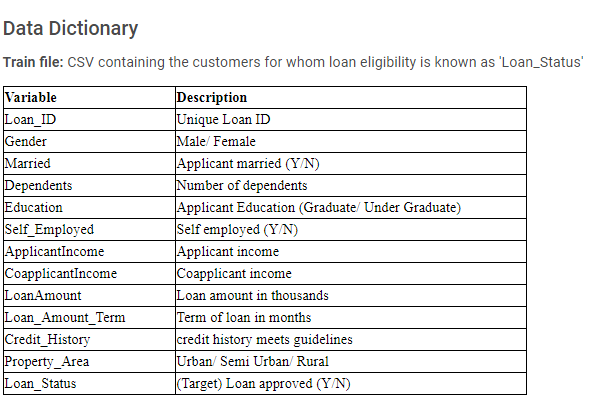

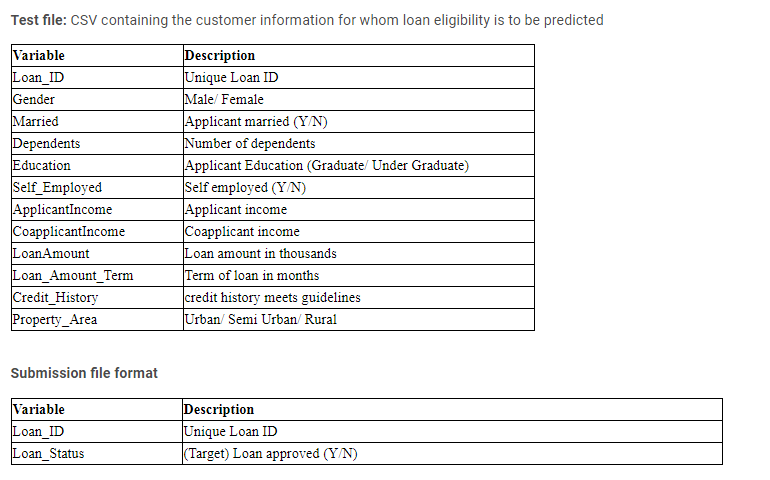

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df_train = pd.read_csv('/content/drive/My Drive/loan_prediction/train_ctrUa4K (2).csv')
df_test = pd.read_csv('/content/drive/My Drive/loan_prediction/test_lAUu6dG (2).csv')
sub = pd.read_csv('/content/drive/My Drive/loan_prediction/sample_submission_49d68Cx.csv')

In [3]:
df_test.isna().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [4]:
df_train.Loan_Status.value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [5]:
df_train.shape,df_test.shape

((614, 13), (367, 12))

In [6]:
# from sklearn.utils import resample
# upsample_data = df_train.copy()
# majority= upsample_data[upsample_data['Loan_Status']=="Y"]
# minority = upsample_data[upsample_data['Loan_Status']=="N"]
# minority_upsampled =  resample(minority,replace = True,n_samples =422,random_state = 42 )
# del upsample_data
# upsample_data =  pd.concat([majority,minority_upsampled])
# sns.countplot(upsample_data['Loan_Status'])

In [7]:
# df_train = upsample_data.copy()

In [8]:
# df_train['train_or_test']='train'
# df_test['train_or_test']='test'
combined=pd.concat([df_train,df_test])
combined.shape

(981, 13)

In [9]:
combined.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [10]:
combined.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [11]:
categorical = combined.select_dtypes(include=[object])
categorical.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Property_Area', 'Loan_Status'],
      dtype='object')

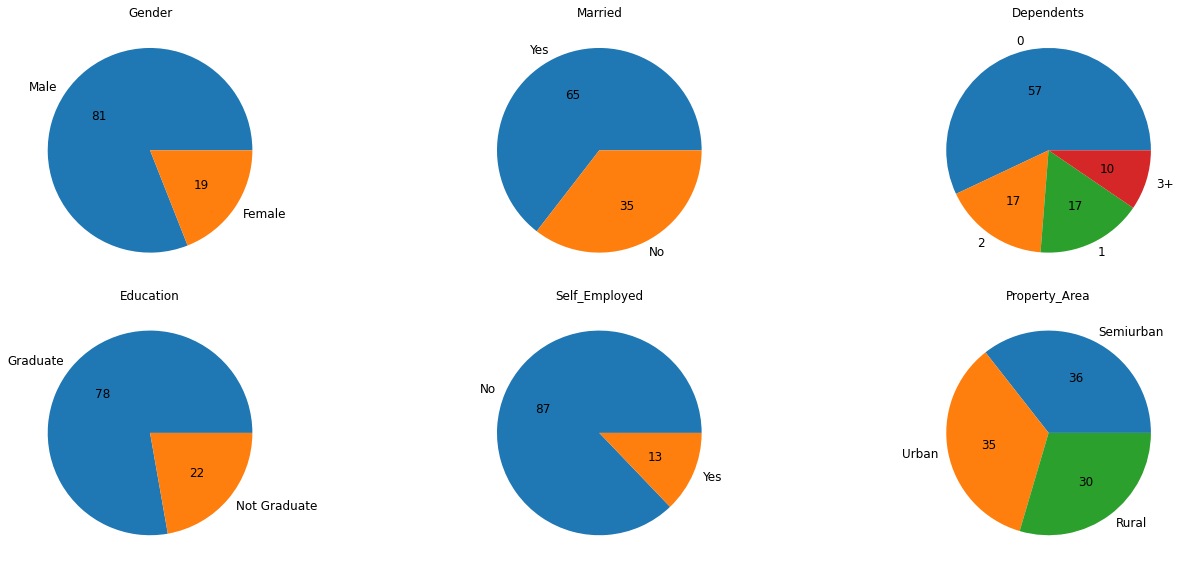

In [12]:
cat_cols = ['Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Property_Area']
fig, axes = plt.subplots(2,3, figsize=(20,8))
axes = [ax for axes_row in axes for ax in axes_row]

for i, col in enumerate(combined[cat_cols]):
    combined[col].value_counts()[::1].plot(kind='pie',ax=axes[i],title =col,autopct = '%.0f',fontsize = 12)
    axes[i].set_ylabel('')

plt.tight_layout()

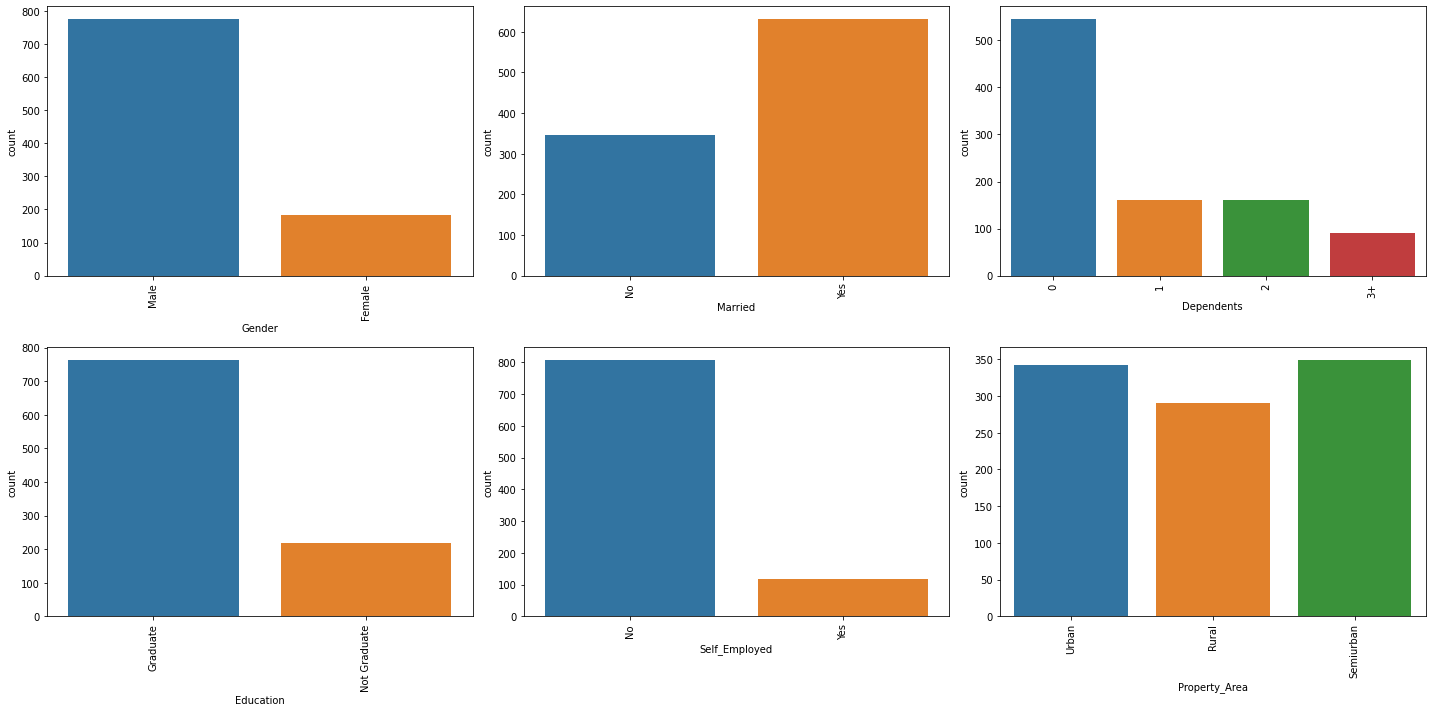

In [13]:
fig, ax = plt.subplots(2,3, figsize=(20, 10))
for variable, subplot in zip(cat_cols, ax.flatten()):
    sns.countplot(combined[variable], ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(90)
    
plt.tight_layout()

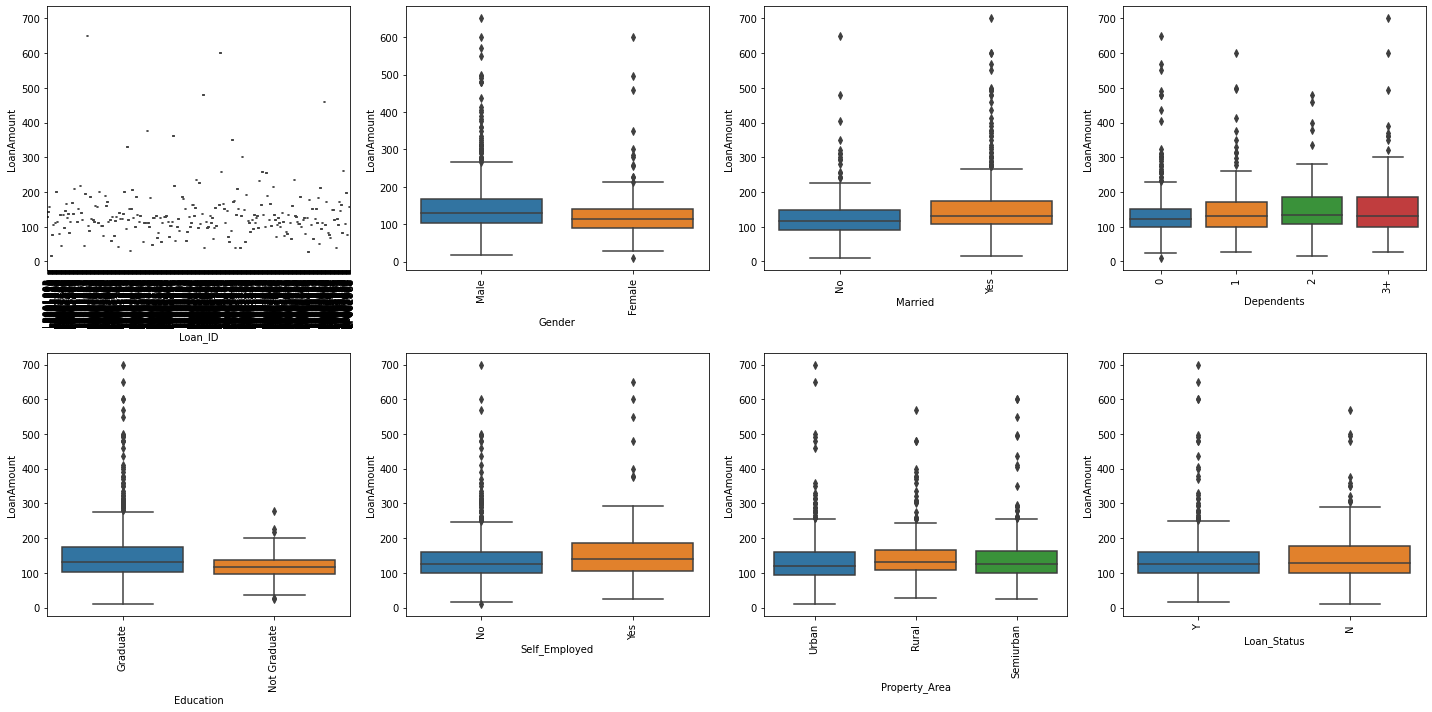

In [14]:
fig, ax = plt.subplots(2,4, figsize=(20, 10))
for var, subplot in zip(categorical, ax.flatten()):
    sns.boxplot(x=var, y='LoanAmount', data=combined, ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(90)
plt.tight_layout()

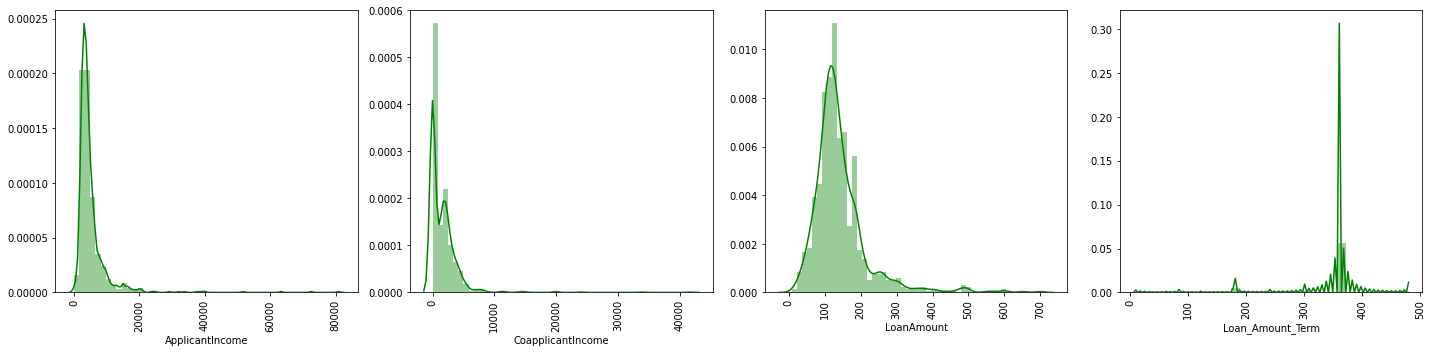

In [15]:
numerical = combined.select_dtypes(include=[int,float])
fig, ax = plt.subplots(1, 4, figsize=(20, 5))
for variable, subplot in zip(numerical, ax.flatten()):
    sns.distplot(combined[variable], ax=subplot,color='green')
    for label in subplot.get_xticklabels():
        label.set_rotation(90)
plt.tight_layout()

In [16]:
df_train['Loan_Status'] = df_train['Loan_Status'].map({'Y': 1,'N': 0})

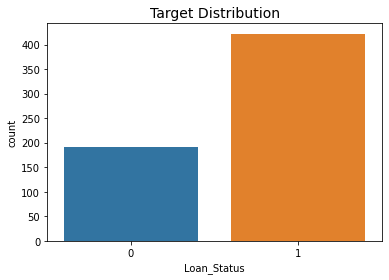

In [17]:
ID_COL, TARGET_COL = 'Loan_ID', 'Loan_Status'
df_train[TARGET_COL].value_counts(normalize=True)
_ = sns.countplot(df_train[TARGET_COL])
_ = plt.title("Target Distribution", fontsize=14)

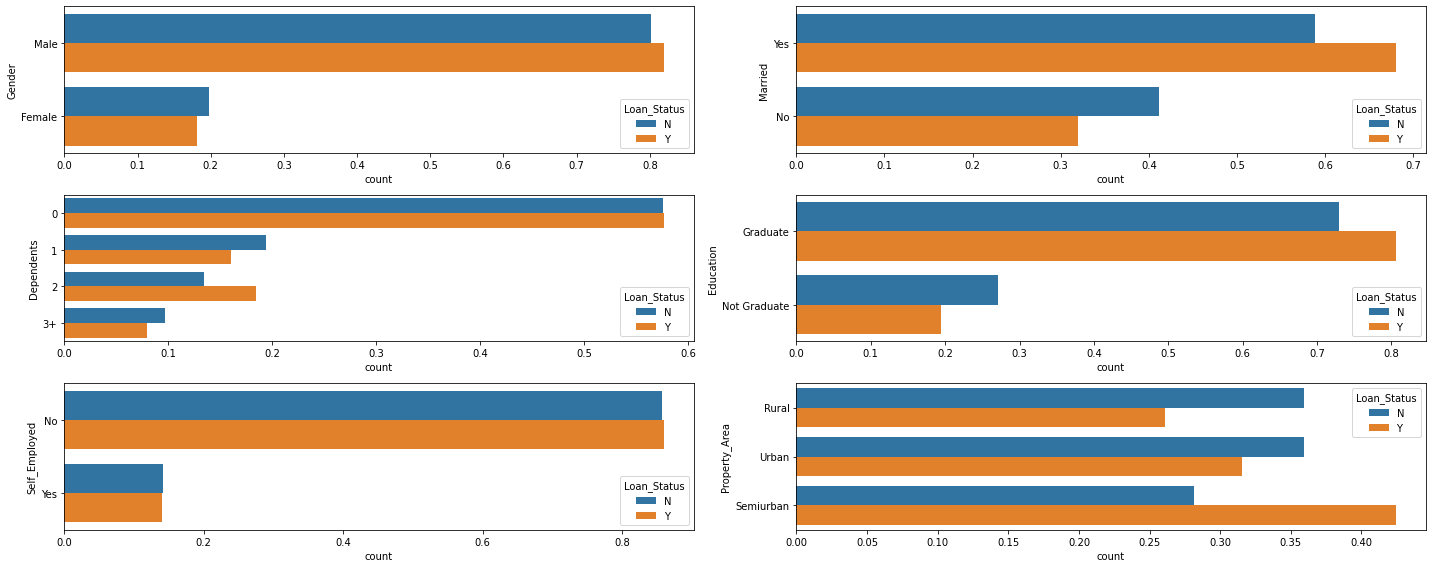

In [18]:
%matplotlib inline
fig, axes = plt.subplots(3, 2, figsize=(20, 8))
axes = [ax for axes_row in axes for ax in axes_row]

for i, c in enumerate(df_train[cat_cols]):
    fltr = df_train[TARGET_COL] == 0
    vc_a = df_train[fltr][c].value_counts(normalize=True).reset_index().rename({'index' : c, c: 'count'}, axis=1)

    vc_b = df_train[~fltr][c].value_counts(normalize=True).reset_index().rename({'index' : c, c: 'count'}, axis=1)

    vc_a[TARGET_COL] = 'N'
    vc_b[TARGET_COL] = 'Y'

    df = pd.concat([vc_a, vc_b]).reset_index(drop = True)

    _ = sns.barplot(y = c, x = 'count', data =df , hue=TARGET_COL, ax=axes[i])
    
_ = plt.tight_layout()

In [19]:
combined['Gender'] = combined.Gender.fillna('Male')
combined['Married'] = combined.Married.fillna('Yes')

In [20]:
combined.isna().sum()

Loan_ID                0
Gender                 0
Married                0
Dependents            25
Education              0
Self_Employed         55
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount            27
Loan_Amount_Term      20
Credit_History        79
Property_Area          0
Loan_Status          367
dtype: int64

In [21]:
combined['Dependents'] = np.where(combined['CoapplicantIncome']>0, combined['Dependents'].fillna(1),  combined['Dependents'].fillna(0))            

In [22]:
combined.Self_Employed.value_counts()

No     807
Yes    119
Name: Self_Employed, dtype: int64

In [23]:
combined['Self_Employed'] = np.where(combined.groupby(combined['Self_Employed']=='No')['LoanAmount'].transform('mean')<140, combined['Self_Employed'].fillna('No'),  combined['Self_Employed'].fillna('Yes'))

In [24]:
combined['Wallet_Size'] = combined['ApplicantIncome'] + combined['CoapplicantIncome']
combined['LoanAmount'] = combined['LoanAmount']*1000
combined['Wallet_Share'] = combined['Wallet_Size']/combined['LoanAmount']
combined['Wallet_Share'] = combined['Wallet_Share'].fillna(.045)
combined['LoanAmount'] = combined['LoanAmount'].fillna(combined['Wallet_Size']/combined['Wallet_Share']).round()
combined['Loan_Amount_Term'] = combined['Loan_Amount_Term'].fillna(combined['LoanAmount']/(combined['Wallet_Size']*.063))
combined['Credit_History'] = combined['Credit_History'].fillna(1)


In [25]:
combined.isna().sum()

Loan_ID                0
Gender                 0
Married                0
Dependents             0
Education              0
Self_Employed          0
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount             0
Loan_Amount_Term       0
Credit_History         0
Property_Area          0
Loan_Status          367
Wallet_Size            0
Wallet_Share           0
dtype: int64

In [26]:
def emi(Principal, annual_r, n):
    r = (annual_r / 100) / 12  # decimal monthly interest rate from APR
    MonthlyPayment = (r * Principal * ((1+r) ** n)) / (((1+r) ** n) - 1)
    return MonthlyPayment


In [27]:
combined['EMI'] = emi(combined['LoanAmount'],3.72,combined['Loan_Amount_Term']).round()

In [28]:
combined['Balance_Amount'] = combined['Wallet_Size']-combined['EMI']

In [29]:
combined['family_str'] = np.where(combined['Dependents']=='3+',3,combined['Dependents'])
combined['family_str'] = np.where(combined['family_str']=='0',1,combined['family_str'])


In [30]:
combined.family_str = combined.family_str.astype(int)

In [31]:
combined['family_str'] = np.where(combined['Married']=='No',combined['family_str'],combined['family_str']+1)

In [32]:
combined['Effective_share_index'] = combined['Balance_Amount']/combined['family_str']

In [33]:
combined.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Wallet_Size,Wallet_Share,EMI,Balance_Amount,family_str,Effective_share_index
0,LP001002,Male,No,0,Graduate,No,5849,0.0,129978.0,360.0,1.0,Urban,Y,5849.0,0.045000,600.0,5249.0,1,5249.0
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128000.0,360.0,1.0,Rural,N,6091.0,0.047586,591.0,5500.0,2,2750.0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66000.0,360.0,1.0,Urban,Y,3000.0,0.045455,305.0,2695.0,2,1347.5
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120000.0,360.0,1.0,Urban,Y,4941.0,0.041175,554.0,4387.0,2,2193.5
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141000.0,360.0,1.0,Urban,Y,6000.0,0.042553,651.0,5349.0,1,5349.0


In [34]:
combined['Gender'] = combined['Gender'].map({'Male': 1,'Female': 0})
combined['Married'] = combined['Married'].map({'Yes': 1,'No': 0})
combined['Self_Employed'] = combined['Self_Employed'].map({'Yes': 0,'No': 1})
combined['Education'] = combined['Education'].map({'Graduate': 1,'Not Graduate': 0})
combined['Credit_History'] = combined['Credit_History'].map({1.0: 1,0.0: 0})
combined['Property_Area'] = combined['Property_Area'].map({'Urban': 2,'Rural': 0,'Semiurban':1})
combined['Loan_Status'] = combined['Loan_Status'].map({'Y': 1,'N': 0})

In [35]:
combined['Credit_History'] = combined['Credit_History'].astype(int)

In [36]:
ref_cat = combined[['ApplicantIncome','CoapplicantIncome','Balance_Amount','Effective_share_index','EMI','family_str']]
combined.drop(ref_cat,inplace=True,axis=1)

In [37]:
combined.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Wallet_Size,Wallet_Share
0,LP001002,1,0,0,1,1,129978.0,360.0,1,2,1.0,5849.0,0.045000
1,LP001003,1,1,1,1,1,128000.0,360.0,1,0,0.0,6091.0,0.047586
2,LP001005,1,1,0,1,0,66000.0,360.0,1,2,1.0,3000.0,0.045455
3,LP001006,1,1,0,0,1,120000.0,360.0,1,2,1.0,4941.0,0.041175
4,LP001008,1,0,0,1,1,141000.0,360.0,1,2,1.0,6000.0,0.042553


In [38]:
combined[['LoanAmount', 'Wallet_Size']] = combined[['LoanAmount', 'Wallet_Size']].astype(int)


In [39]:
combined = pd.get_dummies(data=combined, columns=['Dependents','Property_Area'],drop_first=True)
combined.head(3)

,Loan_ID,Gender,Married,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Wallet_Size,Wallet_Share,Dependents_1,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Property_Area_1,Property_Area_2
0,LP001002,1,0,1,1,129978,360.0,1,1.0,5849,0.045000,0,1,0,0,0,0,1
1,LP001003,1,1,1,1,128000,360.0,1,0.0,6091,0.047586,0,0,1,0,0,0,0
2,LP001005,1,1,1,0,66000,360.0,1,1.0,3000,0.045455,0,1,0,0,0,0,1


In [40]:
from sklearn.preprocessing import LabelEncoder
#Fetch features of type Object
objFeatures = combined[['Loan_Amount_Term']]

#Iterate a loop for features of type object
le = LabelEncoder()

for feat in objFeatures:
    combined[feat] = le.fit_transform(combined[feat].astype(str))

combined.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 981 entries, 0 to 366
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Loan_ID           981 non-null    object 
 1   Gender            981 non-null    int64  
 2   Married           981 non-null    int64  
 3   Education         981 non-null    int64  
 4   Self_Employed     981 non-null    int64  
 5   LoanAmount        981 non-null    int64  
 6   Loan_Amount_Term  981 non-null    int64  
 7   Credit_History    981 non-null    int64  
 8   Loan_Status       614 non-null    float64
 9   Wallet_Size       981 non-null    int64  
 10  Wallet_Share      981 non-null    float64
 11  Dependents_1      981 non-null    uint8  
 12  Dependents_0      981 non-null    uint8  
 13  Dependents_1      981 non-null    uint8  
 14  Dependents_2      981 non-null    uint8  
 15  Dependents_3+     981 non-null    uint8  
 16  Property_Area_1   981 non-null    uint8  
 1

In [41]:
# Splitting
train_proc, test_proc = combined[:df_train.shape[0]], combined[df_train.shape[0]:].reset_index(drop = True)
features = [c for c in train_proc.columns if c not in [ID_COL, TARGET_COL]]

In [42]:
len(features)

16

In [43]:
TARGET_COL = 'Loan_Status'
TARGET_COL

'Loan_Status'

In [44]:
from sklearn.model_selection import train_test_split
trn, val = train_test_split(train_proc, test_size=0.2, random_state = 1, stratify = train_proc[TARGET_COL])

###### Input to our model will be the features
X_trn, X_val = trn[features], val[features]

###### Output of our model will be the TARGET_COL
y_trn, y_val = trn[TARGET_COL], val[TARGET_COL]

##### Features for the test data that we will be predicting
X_test = test_proc[features]

In [45]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
_ = scaler.fit(X_trn)

X_trn = scaler.transform(X_trn)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

In [46]:
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import accuracy_score, f1_score

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

from lightgbm import LGBMClassifier

from xgboost import XGBClassifier

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

pd.set_option('display.max_colwidth', -1)

import warnings
warnings.simplefilter('ignore')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  


In [47]:
clf = LogisticRegression(random_state = 1)
_ = clf.fit(X_trn, y_trn)

thr = .31
preds_val = clf.predict_proba(X_val)[:,1]
pred_val1 = np.where(preds_val>thr,1,0)

accuracy_score(y_val, pred_val1)

0.8373983739837398

In [48]:
y_pred = clf.predict_proba(X_test)[:,1]

In [49]:
sub['log_reg'] = y_pred
sub['final'] = np.where(y_pred>thr,1,0)
sub

,Loan_ID,Loan_Status,log_reg,final
0,LP001015,N,0.810203,1
1,LP001022,N,0.743412,1
2,LP001031,N,0.815676,1
3,LP001035,N,0.840252,1
4,LP001051,N,0.679285,1
...,...,...,...,...
362,LP002971,N,0.735499,1
363,LP002975,N,0.809467,1
364,LP002980,N,0.857253,1
365,LP002986,N,0.768457,1


In [50]:
sub.to_csv('final_log_reg_loan.csv')

In [51]:
clf = DecisionTreeClassifier(random_state = 1)
_ = clf.fit(X_trn, y_trn)
thr = .5
preds_val = clf.predict_proba(X_val)[:,1]
pred_val1 = np.where(preds_val>thr,1,0)

accuracy_score(y_val, pred_val1)

0.7479674796747967

In [52]:

from sklearn.model_selection import RandomizedSearchCV

hyperparam_combs = {
    'max_depth': [4, 6, 8, 10, 12, 14, 16],
    'criterion': ['gini', 'entropy'],
    'min_samples_split': [2, 10, 20, 30, 40],
    'max_features': [0.2, 0.4, 0.6, 0.8, 1],
    'max_leaf_nodes': [8, 16, 32, 64, 128,256],
    'class_weight': [{0: 1, 1: 1}, {0: 1, 1: 2}, {0: 1, 1: 3}, {0: 1, 1: 4}, {0: 1, 1: 5}]
}

clf = RandomizedSearchCV(DecisionTreeClassifier(),
                         hyperparam_combs,
                         scoring='accuracy',
                         random_state=1,
                         n_iter=20)

search = clf.fit(train_proc[features], train_proc[TARGET_COL])

search.best_params_

{'class_weight': {0: 1, 1: 3},
 'criterion': 'gini',
 'max_depth': 16,
 'max_features': 0.8,
 'max_leaf_nodes': 8,
 'min_samples_split': 20}

In [53]:

optimal_params = {'class_weight': {0: 1, 1: 3},
 'criterion': 'gini',
 'max_depth': 16,
 'max_features': 0.8,
 'max_leaf_nodes': 8,
 'min_samples_split': 20}

clf = DecisionTreeClassifier(random_state = 1, **optimal_params)
_ = clf.fit(X_trn, y_trn)

preds_val = clf.predict(X_val)

accuracy_score(y_val, preds_val)

0.8130081300813008

In [54]:
from sklearn.model_selection import StratifiedKFold
def run_clf_kfold(clf, train, test, features):

  N_SPLITS = 5

  oofs = np.zeros(len(train))
  preds = np.zeros((len(test)))

  folds = StratifiedKFold(n_splits = N_SPLITS)

  for fold_, (trn_idx, val_idx) in enumerate(folds.split(train, train[TARGET_COL])):
    print(f'\n------------- Fold {fold_ + 1} -------------')

    ############# Get train, validation and test sets along with targets ################
  
    ### Training Set
    X_trn, y_trn = train[features].iloc[trn_idx], target.iloc[trn_idx]

    ### Validation Set
    X_val, y_val = train[features].iloc[val_idx], target.iloc[val_idx]

    ### Test Set
    X_test = test[features]

    ############# Scaling Data ################
    scaler = StandardScaler()
    _ = scaler.fit(X_trn)

    X_trn = scaler.transform(X_trn)
    X_val = scaler.transform(X_val)
    X_test = scaler.transform(X_test)


    ############# Fitting and Predicting ################

    _ = clf.fit(X_trn, y_trn)

    ### Instead of directly predicting the classes we will obtain the probability of positive class.
    preds_val = clf.predict_proba(X_val)[:, 1]
    preds_test = clf.predict_proba(X_test)[:, 1]

    fold_score = accuracy_score(y_val, preds_val.round())
    print(f'\naccuracy score for validation set is {fold_score}')

    oofs[val_idx] = preds_val
    preds += preds_test / N_SPLITS


  oofs_score = accuracy_score(target, oofs.round())
  print(f'\n\naccuracy score for oofs is {oofs_score}')

  return oofs, preds

In [55]:
target = df_train[TARGET_COL]

In [56]:
dt_params = {'class_weight': {0: 1, 1: 2},
             'criterion': 'gini',
             'max_depth': 14,
             'max_features': 0.8,
             'max_leaf_nodes': 128,
             'min_samples_split': 20,
             'random_state': 1
             }

clf = DecisionTreeClassifier(**dt_params)
        

dt_oofs, dt_preds = run_clf_kfold(clf, train_proc, test_proc, features)


------------- Fold 1 -------------

accuracy score for validation set is 0.7398373983739838

------------- Fold 2 -------------

accuracy score for validation set is 0.8211382113821138

------------- Fold 3 -------------

accuracy score for validation set is 0.7560975609756098

------------- Fold 4 -------------

accuracy score for validation set is 0.7886178861788617

------------- Fold 5 -------------

accuracy score for validation set is 0.8032786885245902


accuracy score for oofs is 0.7817589576547231


In [57]:
from lightgbm import LGBMClassifier

clf = LGBMClassifier()
lgb_oofs, lgb_preds = run_clf_kfold(clf, train_proc, test_proc, features)


------------- Fold 1 -------------

accuracy score for validation set is 0.7479674796747967

------------- Fold 2 -------------

accuracy score for validation set is 0.7723577235772358

------------- Fold 3 -------------

accuracy score for validation set is 0.7560975609756098

------------- Fold 4 -------------

accuracy score for validation set is 0.8373983739837398

------------- Fold 5 -------------

accuracy score for validation set is 0.7295081967213115


accuracy score for oofs is 0.7687296416938111


In [58]:
thresholds = np.arange(0, 100)/100
for thresh in thresholds:
  oofs_rounded = (lgb_oofs > thresh) * 1
  thresh_score = accuracy_score(target, oofs_rounded)
  print(f'Threshold {thresh}: {thresh_score}')

Threshold 0.0: 0.6872964169381107
Threshold 0.01: 0.7214983713355049
Threshold 0.02: 0.7345276872964169
Threshold 0.03: 0.747557003257329
Threshold 0.04: 0.754071661237785
Threshold 0.05: 0.758957654723127
Threshold 0.06: 0.762214983713355
Threshold 0.07: 0.7703583061889251
Threshold 0.08: 0.7768729641693811
Threshold 0.09: 0.7768729641693811
Threshold 0.1: 0.7817589576547231
Threshold 0.11: 0.7817589576547231
Threshold 0.12: 0.7833876221498371
Threshold 0.13: 0.7817589576547231
Threshold 0.14: 0.7817589576547231
Threshold 0.15: 0.7833876221498371
Threshold 0.16: 0.7833876221498371
Threshold 0.17: 0.7833876221498371
Threshold 0.18: 0.7833876221498371
Threshold 0.19: 0.7817589576547231
Threshold 0.2: 0.7833876221498371
Threshold 0.21: 0.7866449511400652
Threshold 0.22: 0.7882736156351792
Threshold 0.23: 0.7899022801302932
Threshold 0.24: 0.7931596091205212
Threshold 0.25: 0.7882736156351792
Threshold 0.26: 0.7882736156351792
Threshold 0.27: 0.7899022801302932
Threshold 0.28: 0.785016286

In [59]:
def get_optimal_accuracy_thresh(target, oofs):
  thresholds = np.arange(0, 100)/100
  thresh_scores = []
  for thresh in thresholds:
    oofs_rounded = (lgb_oofs > thresh) * 1
    thresh_score = accuracy_score(target, oofs_rounded)
    thresh_scores.append(thresh_score)
  
  all_thresholds_and_scores = pd.Series(index = thresholds, data = thresh_scores)
  all_thresholds_and_scores.plot(figsize=(10, 6), fontsize=14)
  
  plt.xlabel('Threshold', fontsize=14)
  plt.ylabel('accuracy Score', fontsize=14)

  return all_thresholds_and_scores.sort_values(ascending=False).index.values[0]

Optimal threhold is 0.24


0.7931596091205212

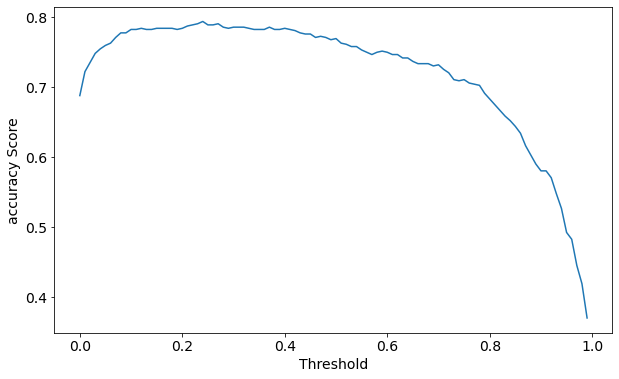

In [60]:
optimal_thresh = get_optimal_accuracy_thresh(target, lgb_oofs)
print(f'Optimal threhold is {optimal_thresh}')
accuracy_score(target, (lgb_oofs > optimal_thresh) * 1)